In [73]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from keys import PostgresqlPass

# follows django database settings format, replace with your own settings
NAME = "Pewlett Hackard2"
USER = "postgres"
PASSWORD = PostgresqlPass
HOST = "localhost"
PORT = 5432

# construct an engine connection string
engine_string = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{NAME}"

#print(engine_string)
        
# create sqlalchemy engine
engine = create_engine(engine_string)


#print(engine)

# read a table from database into pandas dataframe, replace "tablename" with your table name
df = pd.read_sql_table("salaries", engine)
#df


DF = df.drop(['from_date', 'to_date'], axis=1)

DF

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


(39000, 110000)

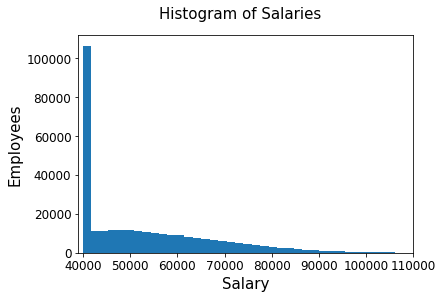

In [70]:
DF['salary'].hist(bins=50, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Employees",fontsize=15)
plt.suptitle("Histogram of Salaries",size=15)
plt.xlim([39000,110000])

In [38]:
titles_df = pd.read_sql_table("titles", engine)
result = pd.merge(titles_df, DF, how='left', on=['emp_no'])
result = result.drop(['emp_no','from_date', 'to_date'], axis=1)
result

,title,salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
4,Senior Engineer,40054
...,...,...
443303,Engineer,49597
443304,Senior Engineer,49597
443305,Senior Staff,40000
443306,Staff,40000


In [39]:
AveSalary = result.groupby(["title"])[["salary"]].mean()
AveSalary


,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


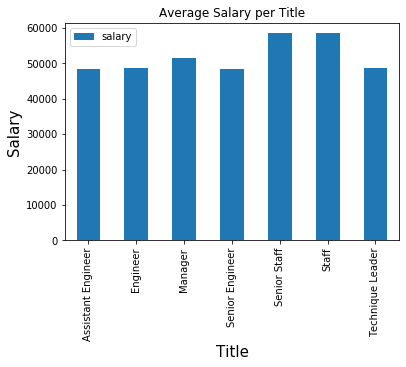

In [63]:
ax = AveSalary.plot.bar(y='salary', rot=90, 
         title='Average Salary per Title')
plt.xlabel("Title", fontsize=15)
plt.ylabel("Salary",fontsize=15)
#plt.xlim([39000,110000])
ax

In [78]:
MyID = df.loc[df['emp_no'] == '499942']
MyID

,emp_no,salary,from_date,to_date
299966,499942,40000,1998-03-28,1999-03-28


In [79]:
DF2 = pd.read_sql_table("employees", engine)
MyID2 = DF2.loc[df['emp_no'] == '499942']
MyID2

,emp_no,birth_date,first_name,last_name,gender,hire_date
299966,499942,1963-01-10,April,Foolsday,F,1997-02-10
